### Load Dependecies and Data

In [1]:
import pandas as pd
import torch
from torchdiffeq import odeint_adjoint as odeint
from SIR_Adjoint import fit
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.interpolate import interp1d, LinearNDInterpolator, NearestNDInterpolator
import matplotlib.patches as mpatches


data = pd.read_csv("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Data/_normalized.csv", index_col = 0)
S, I, R = data['S'].to_numpy(), data['I'].to_numpy(),  data['R'].to_numpy()
S_0, I_0, R_0  = float(S[0]), float(I[0]), float(R[0])
S_0, I_0, R_0  
iB, ig = .01, .01
N = 1

p_0 = [iB, ig, S_0, I_0, R_0 ]

### Git the model and plot outputs

In [2]:
X, model = fit(p_0 = p_0,X = data.to_numpy(), epochs = 200)

p = Parameter containing:
tensor([0.0108, 0.0093, 0.8576, 0.0449, 0.0975], requires_grad=True)
Loss 0 = 0.022762127220630646
p = Parameter containing:
tensor([0.0116, 0.0085, 0.8574, 0.0451, 0.0975], requires_grad=True)
Loss 1 = 0.02160847745835781
p = Parameter containing:
tensor([0.0124, 0.0077, 0.8572, 0.0453, 0.0975], requires_grad=True)
Loss 2 = 0.02025330439209938
p = Parameter containing:
tensor([0.0134, 0.0068, 0.8570, 0.0455, 0.0975], requires_grad=True)
Loss 3 = 0.01867963746190071
p = Parameter containing:
tensor([0.0144, 0.0059, 0.8568, 0.0458, 0.0974], requires_grad=True)
Loss 4 = 0.0169057734310627
p = Parameter containing:
tensor([0.0153, 0.0050, 0.8566, 0.0460, 0.0974], requires_grad=True)
Loss 5 = 0.015026772394776344
p = Parameter containing:
tensor([0.0162, 0.0042, 0.8564, 0.0462, 0.0974], requires_grad=True)
Loss 6 = 0.013255732133984566
p = Parameter containing:
tensor([0.0169, 0.0036, 0.8562, 0.0465, 0.0973], requires_grad=True)
Loss 7 = 0.011887025088071823
p = P

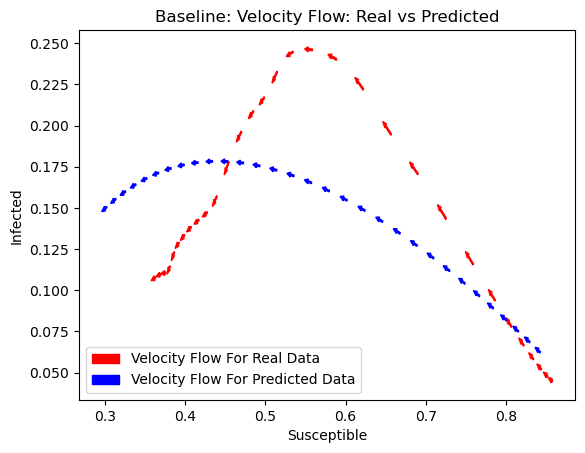

In [3]:
V_true = np.array([S,I]).T
dV_true = V_true[1:,:] - V_true[0:-1]

for t in range(0, len(V_true)-1, 5):
    plt.arrow(x = V_true[t][0], y = V_true[t][1], dx = dV_true[t][0], dy = dV_true[t][1], color = 'red')


with torch.no_grad():

    for t in range(0, len(X), 5):

        S,I,R = X[t][0].detach(),X[t][1].detach(),X[t][2].detach()
        
        dV = model.forward(t = torch.tensor(t+.00001), X = (S,I,R))
        #plt.plot()
        dS = dV[0].detach()
        dI = dV[1].detach()
        s, i = X[t][0].detach(), X[t][1].detach()
        #plt.plot([s,i])
        plt.arrow(x = s, y = i, dx = dS, dy = dI, color = 'blue')

pred_patch = mpatches.Patch(color='blue', label='Velocity Flow For Predicted Data')
true_patch = mpatches.Patch(color='red', label='Velocity Flow For Real Data')



# Add the legend with both the normal and the proxy legend items
plt.title("Baseline: Velocity Flow: Real vs Predicted")
plt.xlabel("Susceptible")
plt.ylabel("Infected")
plt.legend(handles=[true_patch, pred_patch], loc='lower left')
plt.savefig("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Images/Velocity_Baseline.png")


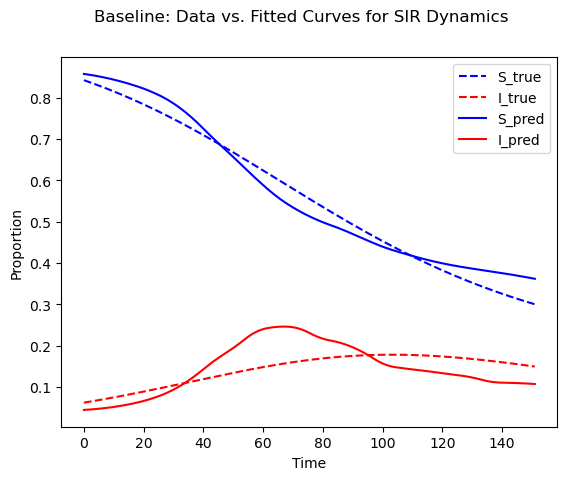

In [5]:

plt.plot(X[:,0].detach(), linestyle='--', color = 'blue', label = "S_true" )
plt.plot(X[:,1].detach(), linestyle='--', color = 'red', label = "I_true" )
plt.plot(data.to_numpy()[:,0], color = 'blue', label = "S_pred" )
plt.plot(data.to_numpy()[:,1], color = 'red', label = "I_pred" )


plt.xlabel('Time')
plt.ylabel('Proportion')
plt.suptitle('Baseline: Data vs. Fitted Curves for SIR Dynamics')
#ax.set_title('Using Results From Fitted Model')
#plt.axhline(y=max(X[:,1]))
plt.legend()

#plt.set_facecolor('lightgrey')
plt.savefig("/Users/omarafifi/MyFolders/Differential-Game-Theory-for-SIR-Models/Images/fitted_Curves_Baseline.png")
